<h1>Project goal: Customer segmentation- clustering</h1><br>

<h3><b>Hypothesis:</b> Different customer demographics and engagement levels influence purchasing behaviors and preferences across six main product categories: fish, meat, fruits, wines, gold, and sweets.</h3>

<b>Data set source:</b> [Customer Personality Analysis (kaggle.com)](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

<b>Project Description:</b> This project uses a dataset with 29 columns and approximately 2,240 rows, containing demographic information about customers (such as age, education, marital status, etc.), engagement levels (including participation in various campaigns), and purchasing behavior (across six main product categories and different purchase channels). The primary goal is to segment customers into distinct groups using clustering techniques.

Specifically, I aim to identify patterns such as:

<ol> <li><b>Customer Demographics:</b> How factors like age, education, income, marital status, and the number of children at home relates to purchases in these six main product categories.</li> 
<li><b>Engagement Behavior:</b> How participation in promotional offers, along with the frequency and types of purchases across different channels (e.g., discount purchases, web purchases, catalog purchases, and store purchases), relates to purchases in these six main product categories.</li> </ol><br>

To achieve this, I will apply clustering algorithms, such as K-means or hierarchical clustering, to group customers based on similarities in their demographic and purchasing data. This analysis will provide insights into customer segments with similar behaviors, facilitating targeted marketing strategies tailored to each segment’s unique characteristics and preferences.

<br>(Try different clustering methods, do evaluation, maybe even try to make some predictions at the end of the project...)



<h2>Importing packages</h2>

In [101]:
#Importing the libraries
# data manipulation and analysis library, it makes possible to work win dataframe format
import pandas as pd

#library for numerical operations, it gives support for arrays, math functions...
import numpy as np

# statistical data visualization library, it makes possible to show advanced grafs
import seaborn as sns

# library for static, and visualizations in
import matplotlib.pyplot as plt

# LinearSegmentedColormap is a class that creates a color map from a list of colors, it is used to create custom color maps
from matplotlib.colors import LinearSegmentedColormap as lsc

#KMeans will be used to create the model for clustering
from sklearn.cluster import KMeans

#silhouette_score will be used to calculate the silhouette score for clustering
from sklearn.metrics import silhouette_score

<h2>Importing data set</h2>

In [73]:
#Importing the dataset
df = pd.read_csv("marketing_campaign.csv", sep='\t')

<h2>Step 1: Exploratory Data Analysis</h2>


In [74]:
#printing info about columns
#it shows column names, number of rows, data types and number of null values per column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [75]:
#describe gives insight about data frame as  min and max, middle, and quartile values per column...
print(df.describe(include='all'))

                  ID   Year_Birth   Education Marital_Status         Income  \
count    2240.000000  2240.000000        2240           2240    2216.000000   
unique           NaN          NaN           5              8            NaN   
top              NaN          NaN  Graduation        Married            NaN   
freq             NaN          NaN        1127            864            NaN   
mean     5592.159821  1968.805804         NaN            NaN   52247.251354   
std      3246.662198    11.984069         NaN            NaN   25173.076661   
min         0.000000  1893.000000         NaN            NaN    1730.000000   
25%      2828.250000  1959.000000         NaN            NaN   35303.000000   
50%      5458.500000  1970.000000         NaN            NaN   51381.500000   
75%      8427.750000  1977.000000         NaN            NaN   68522.000000   
max     11191.000000  1996.000000         NaN            NaN  666666.000000   

            Kidhome     Teenhome Dt_Customer      R

In [76]:
#displaying first 5 rows using head method
#it is useful to see the data structure
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [77]:
#df.columns gives the column names
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [78]:
#i noticed that columns Z_CostContact and Z_Revenue have only one value, so they are not useful for the model
#printing unique values of columns and dropping them
print(df.Z_CostContact.unique())
print(df.Z_Revenue.unique())

df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

[3]
[11]


In [79]:
#counting null values in the dataframe
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64


In [80]:
#replace null values in income with 0
df['Income'] = df['Income'].fillna(0)

In [81]:
#converting the column Dt_Customer to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')


In [82]:
#some columns have names that are not clear, so i will rename them
#renaming columns
df.rename(columns={'Year_Birth': 'Year_of_birth'}, inplace=True)
df.rename(columns={'Recency': 'Last_purchase'}, inplace=True)
df.rename(columns={'MntWines': 'Amount_wines'}, inplace=True)
df.rename(columns={'MntFruits': 'Amount_fruits'}, inplace=True)
df.rename(columns={'MntMeatProducts': 'Amount_meat'}, inplace=True)
df.rename(columns={'MntFishProducts': 'Amount_fish'}, inplace=True)
df.rename(columns={'MntSweetProducts': 'Amount_sweets'}, inplace=True)
df.rename(columns={'MntGoldProds': 'Amount_gold'}, inplace=True)
df.rename(columns={'Kidhome': 'Kids_at_home'}, inplace=True)
df.rename(columns={'Teenhome': 'Teens_at_home'}, inplace=True)
df.rename(columns={'NumDealsPurchases': 'Discount_purchases'}, inplace=True)
df.rename(columns={'NumWebPurchases': 'Web_purchases'}, inplace=True)
df.rename(columns={'NumCatalogPurchases': 'Catalog_purchases'}, inplace=True)
df.rename(columns={'NumStorePurchases': 'Store_purchases'}, inplace=True)
df.rename(columns={'NumWebVisitsMonth': 'Website_visits'}, inplace=True)
df.rename(columns={'Dt_Customer': 'Enrollment_date'}, inplace=True)
df.rename(columns={'AcceptedCmp3': 'Offer_campain_3'}, inplace=True) 
df.rename(columns={'AcceptedCmp4': 'Offer_campain_4'}, inplace=True)
df.rename(columns={'AcceptedCmp5': 'Offer_campain_5'}, inplace=True)
df.rename(columns={'AcceptedCmp1': 'Offer_campain_1'}, inplace=True)
df.rename(columns={'AcceptedCmp2': 'Offer_campain_2'}, inplace=True)
df.rename(columns={'Response': 'Last_campain'}, inplace=True)

df.columns

Index(['ID', 'Year_of_birth', 'Education', 'Marital_Status', 'Income',
       'Kids_at_home', 'Teens_at_home', 'Enrollment_date', 'Last_purchase',
       'Amount_wines', 'Amount_fruits', 'Amount_meat', 'Amount_fish',
       'Amount_sweets', 'Amount_gold', 'Discount_purchases', 'Web_purchases',
       'Catalog_purchases', 'Store_purchases', 'Website_visits',
       'Offer_campain_3', 'Offer_campain_4', 'Offer_campain_5',
       'Offer_campain_1', 'Offer_campain_2', 'Complain', 'Last_campain'],
      dtype='object')

<h3>Listing variables based on their features</h3>
<b> Discrete Variables </b>

- Kids_at_home, Teens_at_home, Discount_purchases, Web_purchases, Catalog_purchases, Store_purchases, Website_visits

<b> Categorical Variables </b>
- Offer_campain_3, Offer_campain_4, Offer_campain_5, Offer_campain_1, Offer_campain_2, Last_campain, Complain, Education, Marital_Status

<b> Continuous Variables </b>
- Year_of_birth, Last_purchase, Income, Amount_wines, Amount_fruits, Amount_meat, Amount_fish, Amount_sweets, Amount_gold

<b> Date Variables </b>
- Enrollment_date

<h2>Presenting data on charts</h3>
It takes in count variable features

In [83]:
#some rows in the Marital_Status column have values that are not clear, probably they are mistakes. I counted them and decided to drop them as tat would not affect the model
print((df["Marital_Status"] == "Absurd").sum())
print((df["Marital_Status"] == "YOLO").sum())
print((df["Marital_Status"] == "Alone").sum())

df = df.drop(df[df['Marital_Status'] == "Absurd"].index)
df = df.drop(df[df['Marital_Status'] == "YOLO"].index)
df= df.replace('Alone', 'Single')

2
2
3


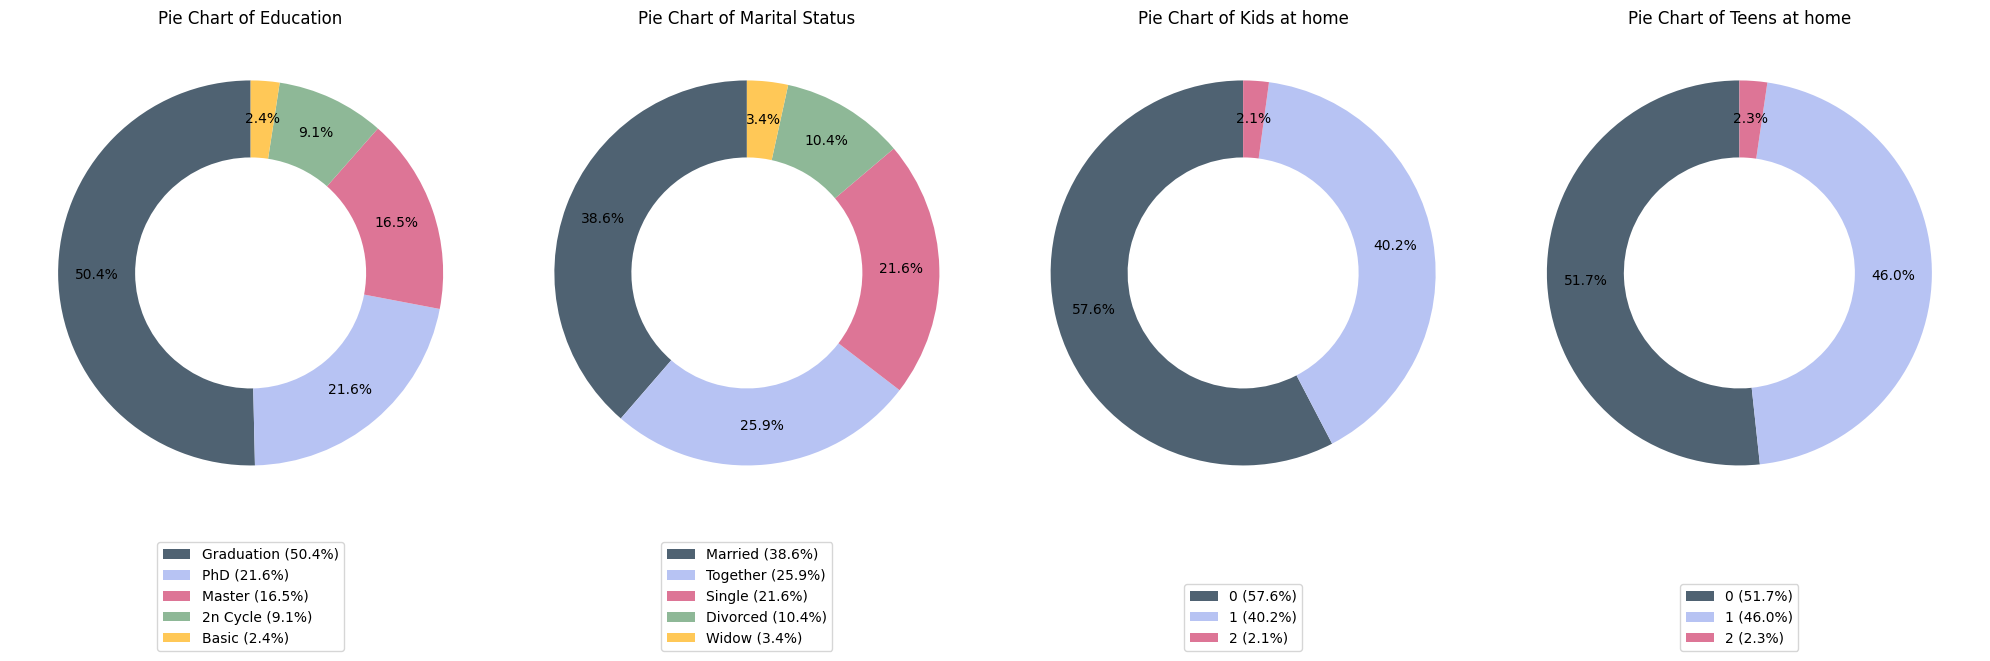

In [84]:
# Columns that will be used
columns = ["Education", "Marital_Status", "Kids_at_home", "Teens_at_home"]
# Colors for pie chart
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#FFC857', '#119DA4', '#19647E', '#FF6F61', '#6A0572']

# Plotting pie charts, and flattening the axs array to iterate over it
fig, axs = plt.subplots(1, 4, figsize=(20, 7))
axs = axs.flatten()

# Iterating over columns and plotting pie charts
for i, column in enumerate(columns):
    ratings_count = df[column].value_counts(dropna=False).sort_values(ascending=False) # getting the count of each rating
    wedges, texts, autotexts = axs[i].pie( # plotting the pie chart
        ratings_count.values, # values
        colors=colors[:len(ratings_count)], # colors
        autopct='%1.1f%%', # percentage format
        startangle=90, # start angle of the pie
        wedgeprops=dict(width=0.4), # width of the pie
        pctdistance=0.8, # distance from center
    )
    axs[i].legend( # adding legend
        wedges,  
        [f'{label} ({pct:.1f}%)' for label, pct in zip(ratings_count.index, 100 * ratings_count.values / ratings_count.values.sum())], # legend labels
        loc='lower center', # location of the legend
        bbox_to_anchor=(0.5, -0.3) # position of the legend
    )
    axs[i].set_title(f"Pie Chart of {column.replace('_', ' ')}", fontsize=12) # setting the title of the plot

plt.tight_layout() # adjusting the layout, so the plots don't overlap
plt.show()

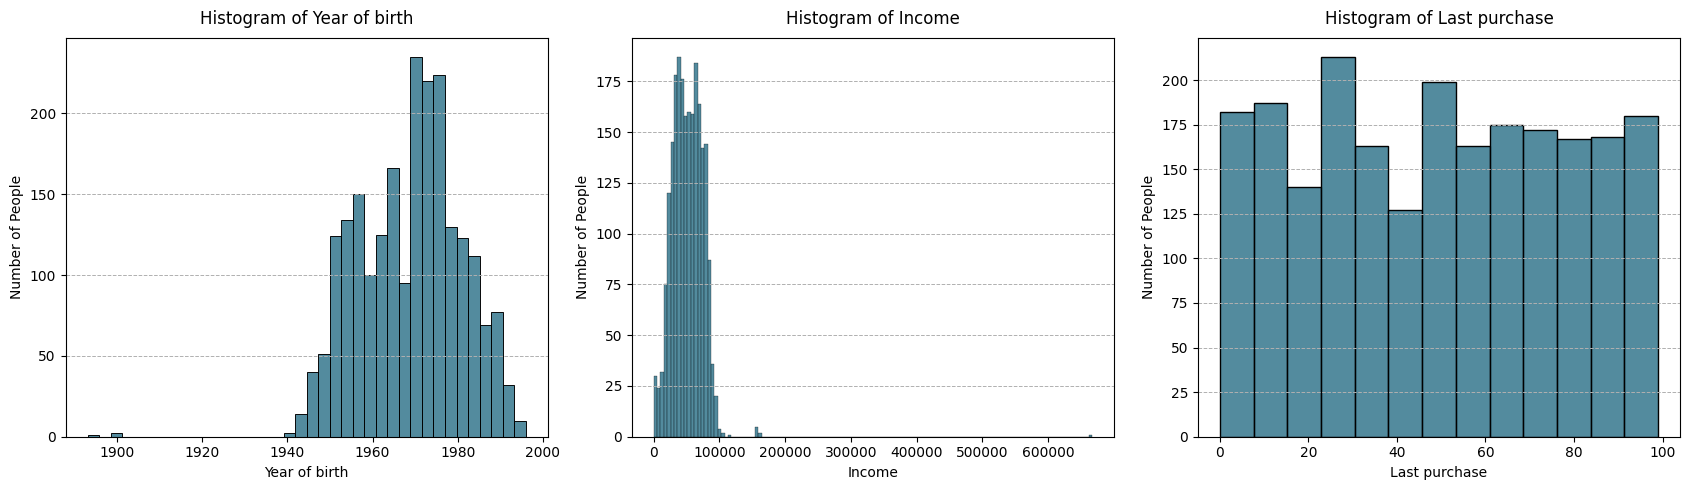

In [85]:
#list of columns that will be used in the plot
columns = ["Year_of_birth", "Income", "Last_purchase"]

#plt.subplots() creates a plot with 3 subplots, 3 per row
#figyre is the container for the plot; axs is 1X1 array
figure, axs = plt.subplots(1, 3, figsize=(17, 5))
# flattens 2D array of axes objects into 1D array
axs = axs.flatten()

#iterates through names of the columns from df that are saved in a list columns
#sns.histplot(df[column], ax=axs[i]) plots a histrogram of the specified column on the corresponding subplot axis
for i, column in enumerate(columns):
    sns.histplot(df[column], ax=axs[i], color='#19647E')
    axs[i].set_title("Histogram of " + column.replace("_", " "), pad=10)
    axs[i].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
    axs[i].set_ylabel('Number of People')
    axs[i].set_xlabel(column.replace("_", " "))

#to avoid charts overlapping
plt.tight_layout()
plt.show()

In [86]:
df = df.drop(df[df['Income'] > 150000].index) #drop the rows with income greater than 150000 as they are outliers
df = df.drop(df[df["Year_of_birth"] < 1940].index) #drop the rows with year of birth less than 1940 as they are outliers

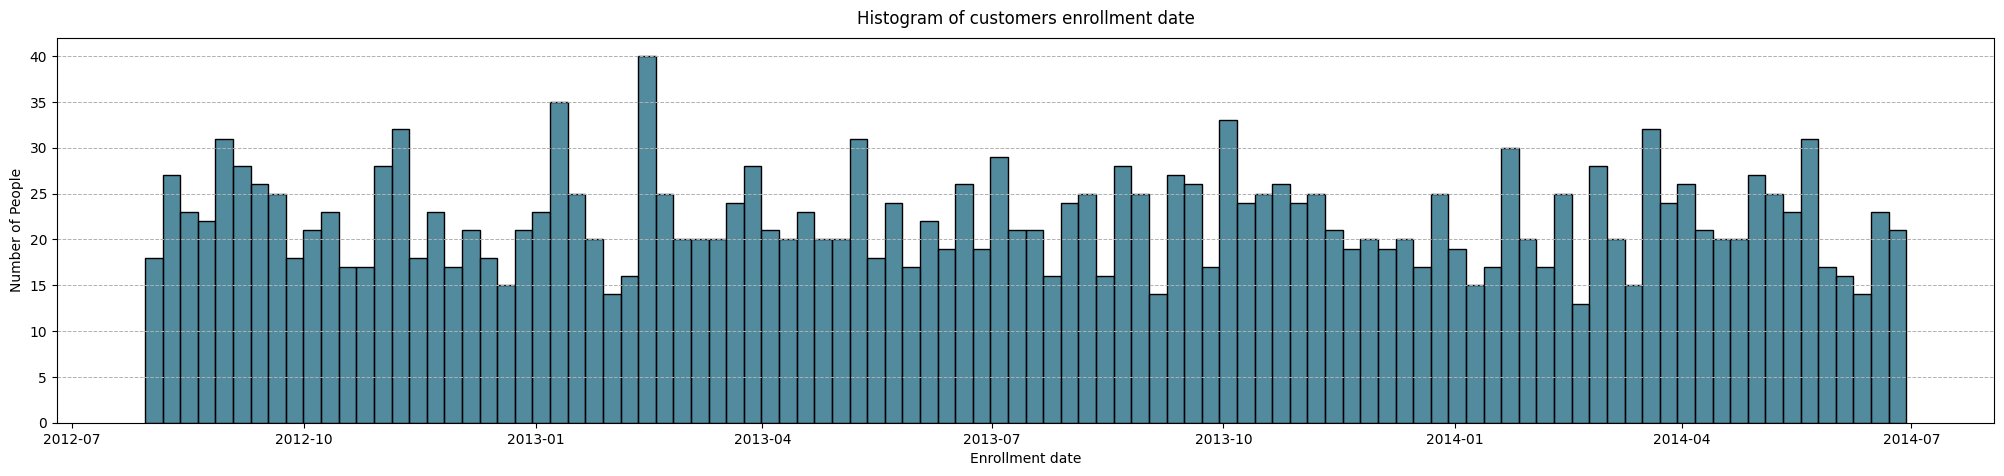

In [88]:
#plotting histogram of enrollment date
plt.figure(figsize=(25, 5))
dtGraf = sns.histplot(df["Enrollment_date"], color='#19647E', bins=100)
dtGraf.set_title("Histogram of customers enrollment date" , pad=10)

#adding grid
dtGraf.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7) 
dtGraf.set_ylabel('Number of People')
dtGraf.set_xlabel('Enrollment date')

plt.show()

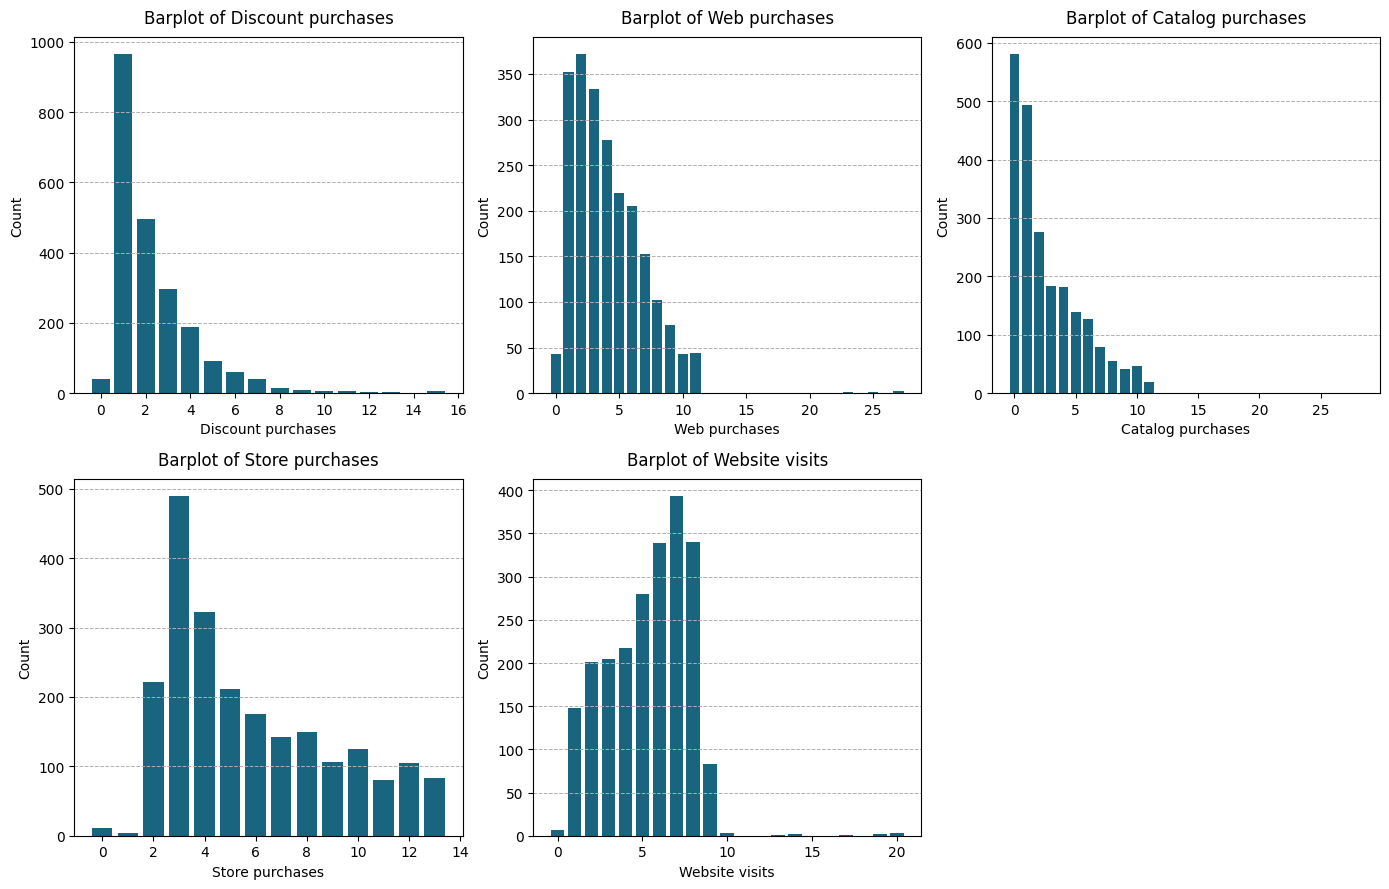

In [89]:
#columns that will be used in the plot
columns=["Discount_purchases", "Web_purchases", "Catalog_purchases", "Store_purchases", "Website_visits"]

#creates a plot with 2 rows and 3 columns and flattens the axes array in order to iterate over it
fig, axs = plt.subplots(2,3, figsize=(14, 9))
axs = axs.flatten()

#iterates over the columns and plots a barplot for each column
for i, column in enumerate(columns):
    ratings_count = df[column].value_counts().sort_index()
    bars = axs[i].bar(ratings_count.index, ratings_count.values, color='#19647E')
    axs[i].set_xlabel(column.replace("_", " "))
    axs[i].set_ylabel('Count')
    axs[i].set_title("Barplot of " + column.replace("_", " ") , pad=10)
    axs[i].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

axs[5].axis('off') # hides the last subplot

plt.tight_layout() # adjusts the layout
plt.show()

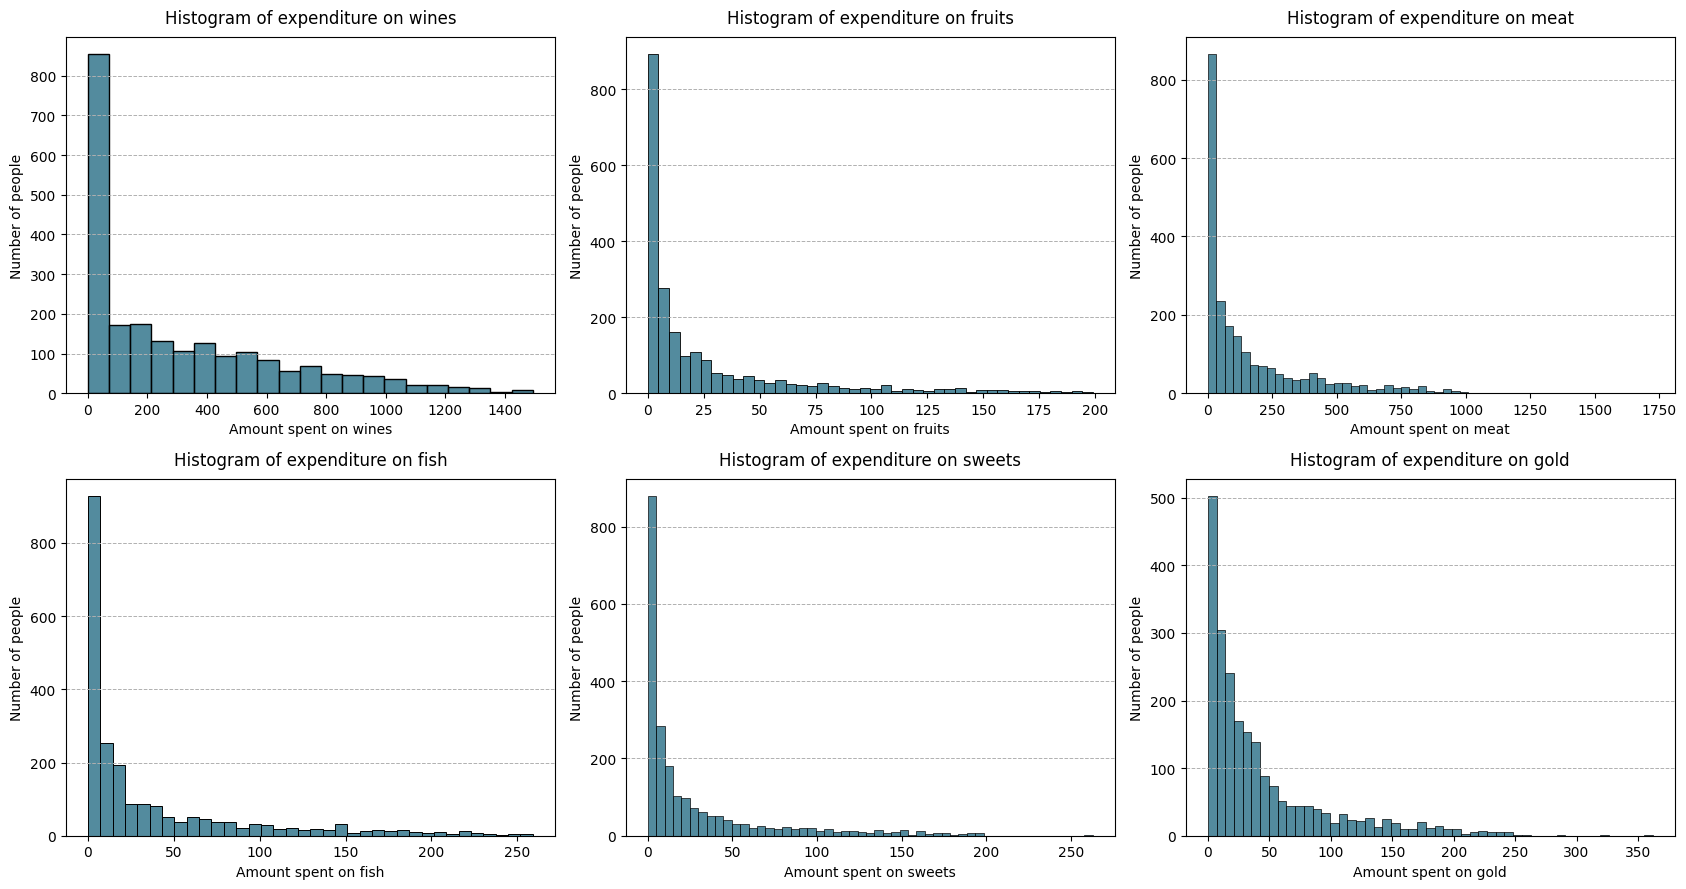

In [90]:
#list of columns that will be used in the plot
columns = ["Amount_wines", "Amount_fruits", "Amount_meat", "Amount_fish", "Amount_sweets", "Amount_gold"]

#plt.subplots() creates a plot with 6 subplots, 3 per row in 2 different rows
#figyre is the container for the plot; axs is 2X3 array
figure, axs = plt.subplots(2, 3, figsize=(17, 9))
# flattens 2D array of axes objects into 1D array
axs = axs.flatten()

#iterates through names of the columns from df that are saved in a list columns
#sns.histplot(df[column], ax=axs[i]) plots a histrogram of the specified column on the corresponding subplot axis
for i, column in enumerate(columns):
    sns.histplot(df[column], ax=axs[i], color='#19647E')
    axs[i].set_title("Histogram of " + column.replace("Amount_", "expenditure on "), pad=10)
    axs[i].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
    axs[i].set_ylabel('Number of people')
    axs[i].set_xlabel(column.replace("_", " spent on "))

#to avoid charts overlapping
plt.tight_layout()
plt.show()

In [91]:
#counting the number of people that spent more than 1000 on meat, more than 200 on sweets and more than 270 on gold as they are outliers
#since their number is small, they will be dropped and that won't affect the model
print((df["Amount_meat"] > 1000).sum())
print((df["Amount_sweets"] > 200).sum())
print((df["Amount_gold"] > 270).sum())

df = df.drop(df[df['Amount_meat'] > 1000].index)
df = df.drop(df[df['Amount_sweets'] > 200].index)
df = df.drop(df[df['Amount_gold'] > 270].index)

2
2
3


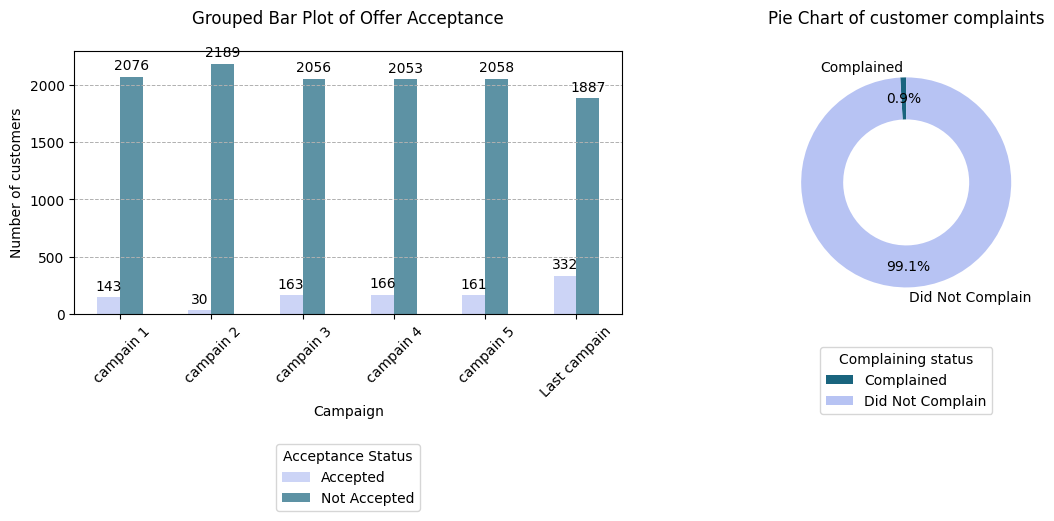

In [92]:
#creating a figure with 2 subplots and flattening the axes array
figure, axs = plt.subplots(1, 2, figsize=(12, 6))
axs = axs.flatten()
plt.subplots_adjust(bottom=0.2) # adjusting the bottom margin

#offer_columns is a list of columns that will be used in the plot
offer_columns = ["Offer_campain_1", "Offer_campain_2", "Offer_campain_3", "Offer_campain_4", "Offer_campain_5", "Last_campain"]

#Create a DataFrame to hold counts of accepted offers
offer_counts = pd.DataFrame()
#Calculate the count of accepted offers for each campaign
for column in offer_columns:
    offer_counts[column] = [df[column].sum(), df[column].count() - df[column].sum()]  # Count of 1s and 0s
#sets the index to be the counts (Accepted, Not Accepted)
offer_counts.index = ['Accepted', 'Not Accepted']

#complaints column has 1 for customers that complained and 0 for those that did not, so we can use sum() to get the count of complaints
complaint_counts = [df["Complain"].sum(), df["Complain"].count() - df["Complain"].sum()]  
complaint_labels = ['Complained', 'Did Not Complain']

#transpose the DataFrame to make it suitable for plotting
offer_counts = offer_counts.T

#creating the grouped bar plot for offers
offer_counts.plot(kind='bar', ax=axs[0], color=["#B7C3F3", "#19647E"], alpha=0.7)
axs[0].set_title("Grouped Bar Plot of Offer Acceptance", pad=20)
axs[0].set_xlabel("Campaign")
axs[0].set_ylabel("Number of customers")
axs[0].set_xticks(range(len(offer_columns))) # Set the x-ticks to be the number of columns
axs[0].set_xticklabels([col.replace("Offer", "").replace("_", " ") for col in offer_columns], rotation=45) # Set the x-tick labels
axs[0].legend(title="Acceptance Status", loc='upper center', bbox_to_anchor=(0.5, -0.47)) # Add the legend
axs[0].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7) # Add grid

#adding the counts on top of the bars
for container in axs[0].containers:
    axs[0].bar_label(container, fmt='%d', label_type='edge', padding=3)

#creating a bar plot for complaints
axs[1].pie(complaint_counts, labels=complaint_labels, autopct='%1.1f%%', startangle=90, colors=["#19647E", "#B7C3F3"], wedgeprops=dict(width=0.4), pctdistance=0.8) 
axs[1].set_title("Pie Chart of customer complaints", pad=20)
axs[1].legend(title="Complaining status", loc='upper center', bbox_to_anchor=(0.5, -0.1))

#adjusting layout
plt.tight_layout()
plt.show()

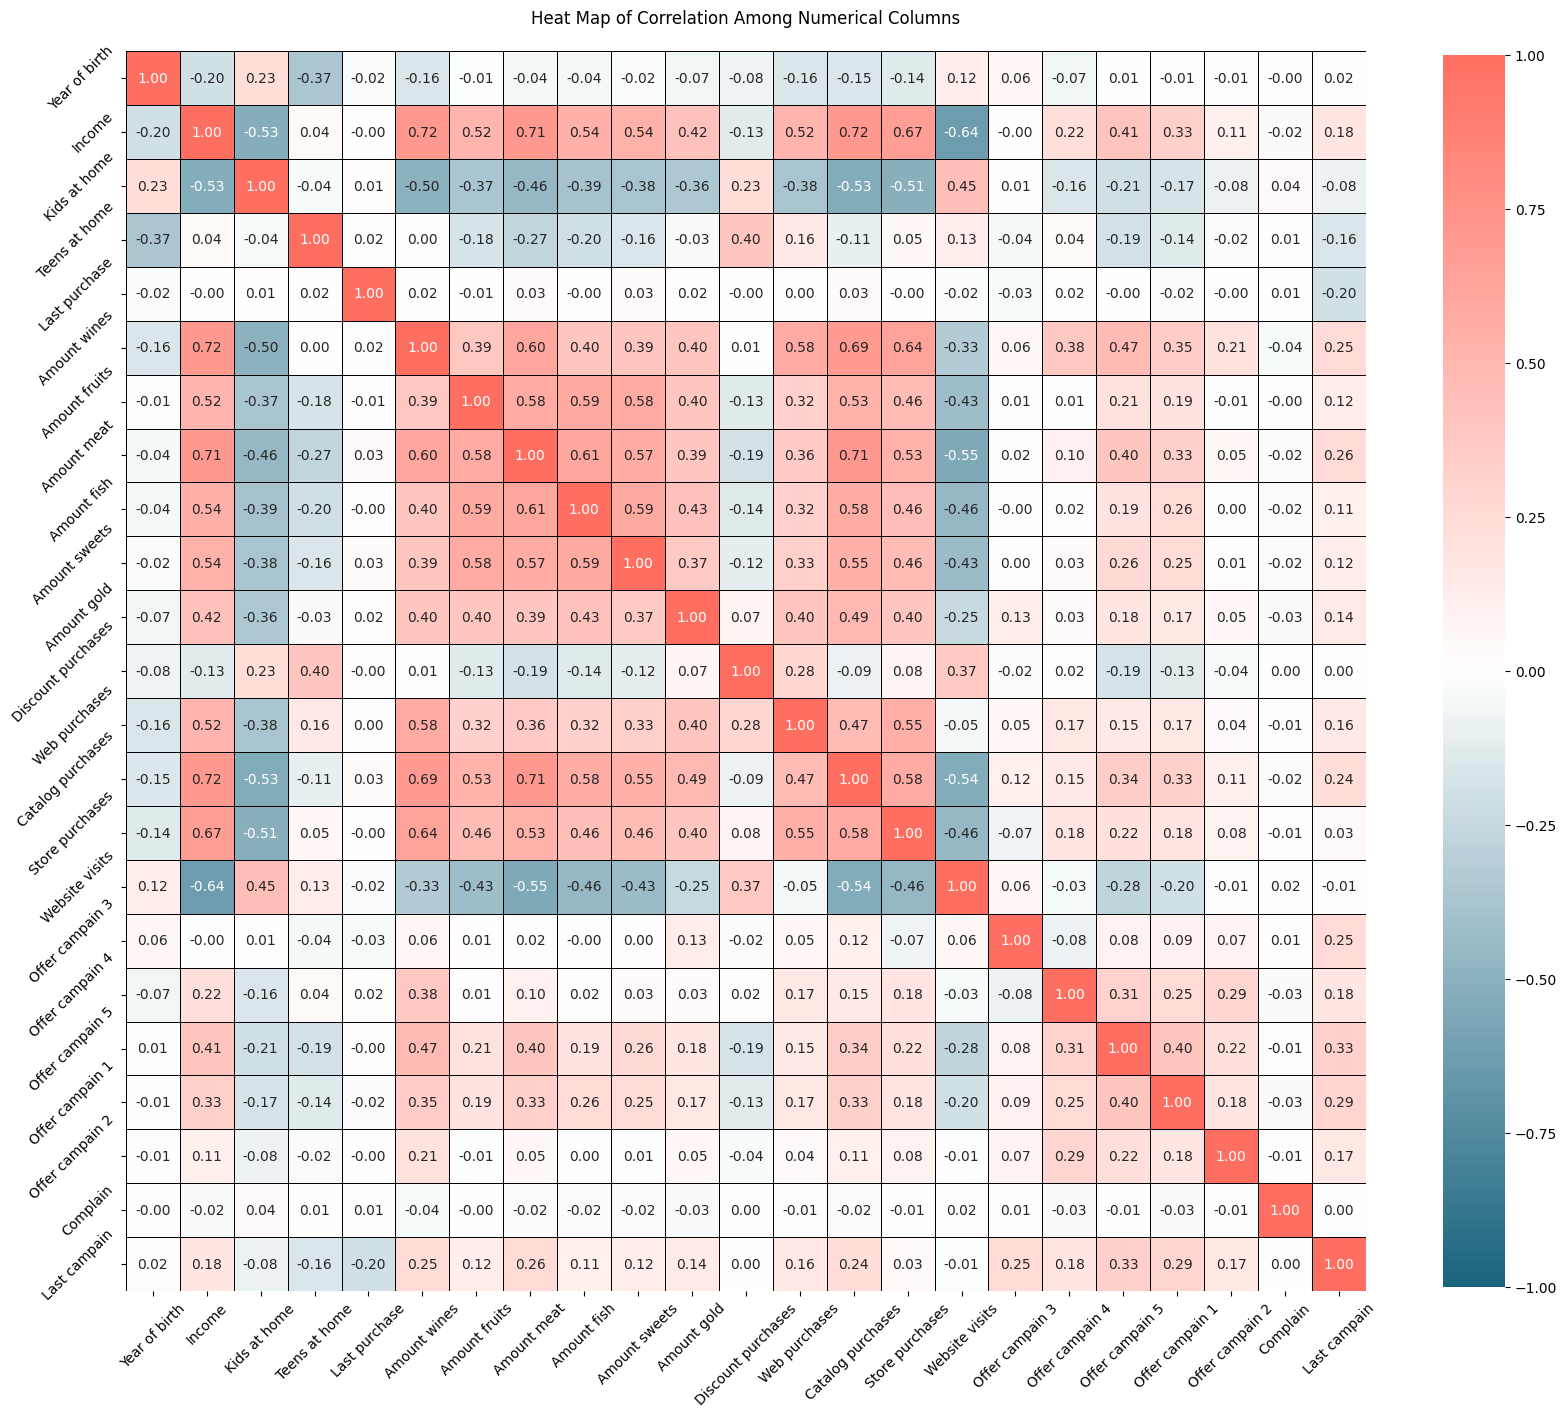

In [93]:
numeric_df = df.select_dtypes(include=[np.number]) #to get only numerical columns
numeric_df.drop(['ID'], axis=1, inplace=True) #drop the ID column
correlation_matrix = numeric_df.corr() #calculate the correlation matrix

custom_colors = ['#19647E', '#FFFFFF', '#FF6F61']  # colors for the heatmap
custom_cmap = lsc.from_list("custom_cmap", custom_colors) # create a custom color map

#plotting the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=custom_cmap, square=True, 
            cbar_kws={"shrink": .8}, linewidths=0.5, linecolor='black', vmin=-1, vmax=1)

plt.title('Heat Map of Correlation Among Numerical Columns', pad=20)
plt.xticks(ticks=np.arange(len(numeric_df.columns)) + 0.5, labels=numeric_df.columns.str.replace("_", " "), rotation=45) #set the x-ticks
plt.yticks(ticks=np.arange(len(numeric_df.columns)) + 0.5, labels=numeric_df.columns.str.replace("_", " "), rotation=45) #set the y-ticks

plt.show()

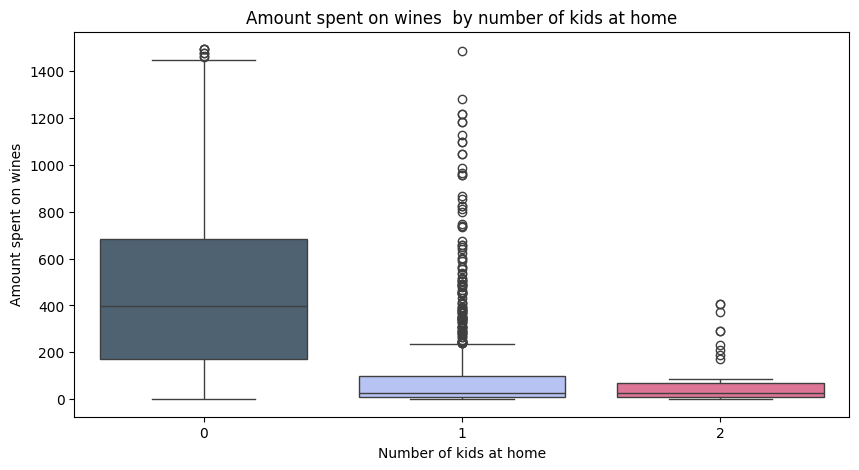

In [94]:
#ploting the boxplot that shows the amount spent on wines by number of kids at home
plt.figure(figsize=(10, 5))
boxplot = sns.boxplot(x='Kids_at_home', y='Amount_wines', data=df, patch_artist=True) 
plt.title('Amount spent on wines  by number of kids at home')
plt.xlabel('Number of kids at home')
plt.ylabel('Amount spent on wines')

#colors for the boxplot, one color for each unique value of the column
for patch, color in zip(boxplot.patches, colors[:len(df['Education'].unique())]):
    patch.set_facecolor(color)

plt.show()

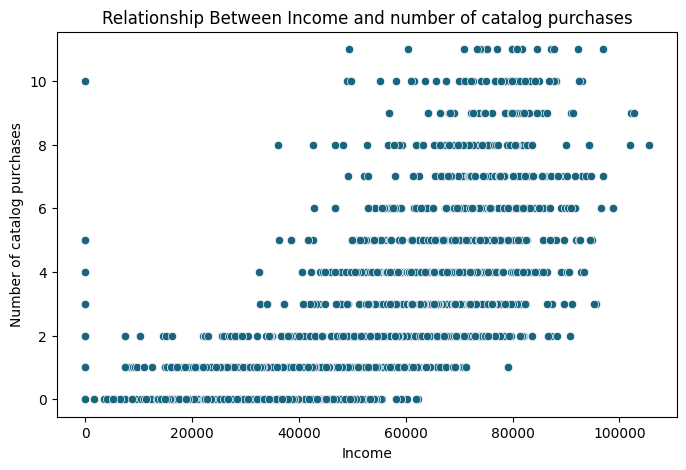

In [95]:
#plotting scatter plot of income and amount spent on wines
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Income', y='Catalog_purchases', data=df, color='#19647E')
plt.title('Relationship Between Income and number of catalog purchases')
plt.xlabel('Income')
plt.ylabel('Number of catalog purchases')
plt.show()


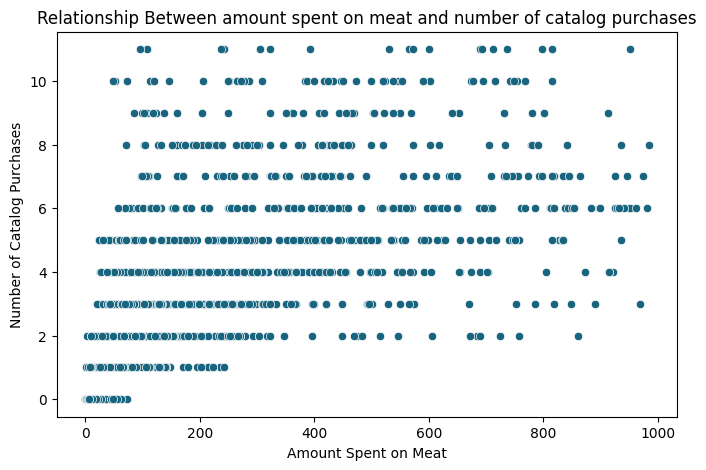

In [96]:
#plotting scatter plot of amount spent on meat and number of catalog purchases
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Amount_meat', y='Catalog_purchases', data=df, color='#19647E')
plt.title('Relationship Between amount spent on meat and number of catalog purchases')
plt.xlabel('Amount Spent on Meat')
plt.ylabel('Number of Catalog Purchases')
plt.show()

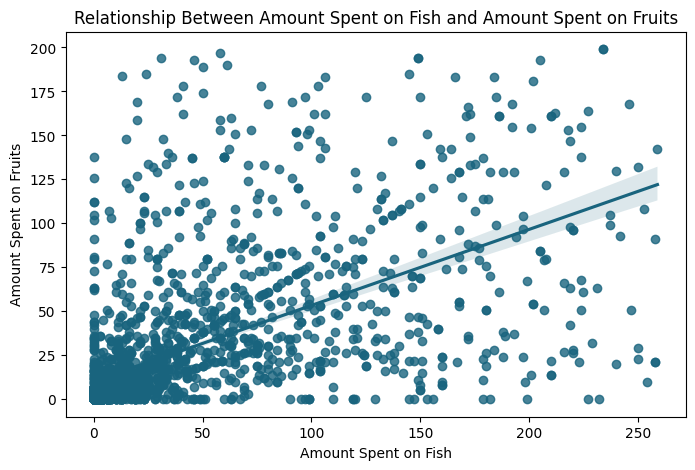

In [97]:
#plotting a regression plot of amount spent on fish and amount spent on fruits
plt.figure(figsize=(8, 5))
sns.regplot(x='Amount_fish', y='Amount_fruits', data=df, color='#19647E')
plt.title('Relationship Between Amount Spent on Fish and Amount Spent on Fruits')
plt.xlabel('Amount Spent on Fish')
plt.ylabel('Amount Spent on Fruits')
plt.show()

<h2>Step 2: Building models</h2>

<h3>Clustering algorithm 1: K-Means Clustering </h3>

In [98]:
#converting non-numeric columns to numeric using one-hot encoding as the k-means model can't work with non-numeric data
df_encoded = pd.get_dummies(df, columns=["Education", "Marital_Status"], drop_first=True)

In [99]:
#setting a reference date- it will be 01-01-2015 as latest enrollment date is in 2014
reference_date = pd.to_datetime('01-01-2015')

#calculating the difference in days
df['Days_since_enrolled'] = (df["Enrollment_date"] - reference_date).dt.days

#addding the column to the encoded dataframe and dropping the enrollment date column
df_encoded['Days_since_enrolled'] = df['Days_since_enrolled']
df_encoded.drop(['Enrollment_date'], axis=1, inplace=True)


<h4>Elbow method</h4>

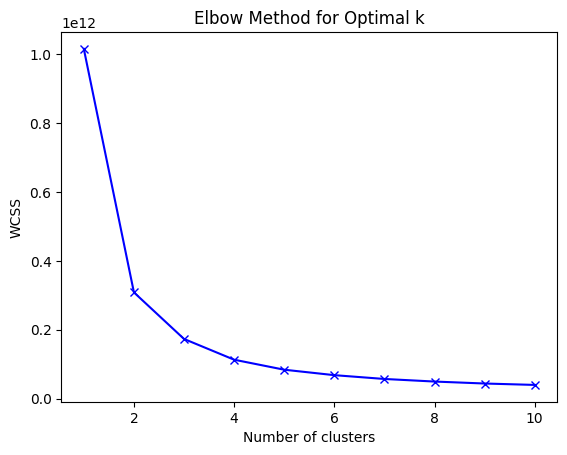

In [ ]:
#wcss is a list that will hold the sum of squared distances of samples to their closest cluster center for different values of k
wcss = []
#range of k values
K = range(1, 11)
#iterating over the range of k values and fitting the k-means model for each value of k and calculating the wcss for each value of k and appending it to the wcss list
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_encoded)
    wcss.append(km.inertia_)

#plot the Elbow Curve
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


<p>Acording to Elbow method, optimal numbers of clusters is where the "elbow" sharply slows down, meaning that adding more clusters that that wouldn't improve clustering.<br>In this case that is at point 3, which means that optimal number of clusters is <b>3</b>.</p>

<h4>Silhouette Method<h4>

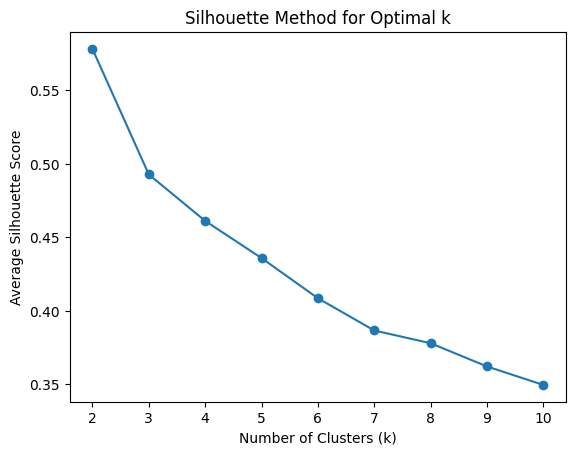

In [ ]:
range_n_clusters = range(2, 11)
silhouette_avg_scores = []
data = df_encoded

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=10)
    cluster_labels = kmeans.fit_predict(data) 
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Average Silhouette Score")
plt.title("Silhouette Method for Optimal Number of Clusters")
plt.show()

<p>Silhouette score is measured between -1 and 1. A score closer to 1 indicates that the data point is very similar to other data points in the cluster, and dissimilar to data points in other clusters. Thats why we chose the highest value of k that has the highest silhouette score- In this case, k=2 </p>

In [122]:
kmeans = KMeans(n_clusters=5, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_encoded)

In [123]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_encoded.columns)
print(cluster_centers)


            ID  Year_of_birth        Income  Kids_at_home  Teens_at_home  \
0  5729.955375    1966.322515  66352.206897      0.131846       0.636917   
1  5452.216846    1971.448029  35556.948029      0.810036       0.453405   
2  5633.783198    1967.701897  81896.355014      0.073171       0.230352   
3  5770.488746    1974.919614  18395.990354      0.752412       0.189711   
4  5437.709016    1965.547131  51155.836066      0.432377       0.850410   

   Last_purchase  Amount_wines  Amount_fruits  Amount_meat  Amount_fish  ...  \
0      48.734280    531.876268      45.105477   257.758621    61.606491  ...   
1      48.353047     56.111111       6.620072    32.320789    10.345878  ...   
2      49.813008    671.493225      65.173442   471.132791    93.439024  ...   
3      50.401929     25.514469       7.231511    20.958199     9.279743  ...   
4      49.319672    264.526639      12.936475    79.577869    20.393443  ...   

   Last_campain  Education_Basic  Education_Graduation  Educat

In [119]:
print(df['Cluster'].value_counts())


Cluster
1    1118
0    1101
Name: count, dtype: int64


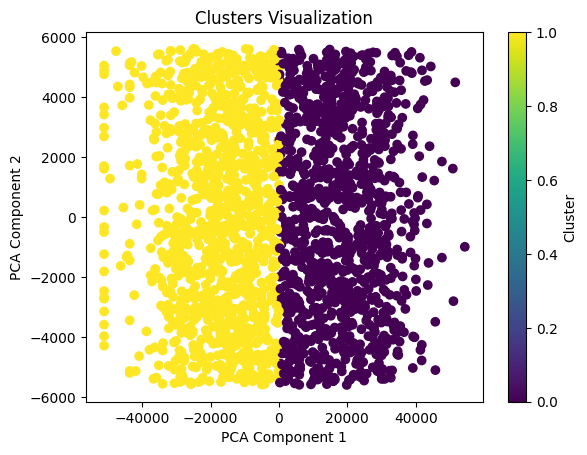

In [120]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_encoded)
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualization')
plt.colorbar(label='Cluster')
plt.show()


In [121]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_encoded, df['Cluster'])
print("Silhouette Score:", score)


Silhouette Score: 0.578104684138558
